In [1]:
!pip install git+https://github.com/KindXiaoming/pykan

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
!pip install git+https://github.com/HoangTung-Vu/sns_kan.git
    

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [3]:
from kan import *
import numpy as np
import matplotlib.pyplot as plt
from kan.KANLayer import KANLayer
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from torch.utils.data import DataLoader


dtype = torch.get_default_dtype()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to tensor and scales the pixel values to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalizes the tensor
])

# Load the MNIST dataset
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

# Extract data and labels
train_inputs = mnist_train.data.view(-1, 28*28)  # Flatten images to shape (number_samples, 784)
train_labels = mnist_train.targets

test_inputs = mnist_test.data.view(-1, 28*28)  # Flatten images to shape (number_samples, 784)
test_labels = mnist_test.targets

# Create the dataset dictionary
train_data = torch.utils.data.TensorDataset(train_inputs.type(dtype), train_labels.type(torch.long))
test_data = torch.utils.data.TensorDataset(test_inputs.type(dtype), test_labels.type(torch.long))

Failed to download (trying next):
HTTP Error 403: Forbidden



  1%|          | 65536/9912422 [00:01<04:54, 33383.83it/s]


KeyboardInterrupt: 

In [20]:
layers = [
    WavKANLayer(784,64, wavelet_type= Wavelet.mexican_hat),
    WavKANLayer(64,10, wavelet_type= Wavelet.mexican_hat)
]
layers = torch.nn.ModuleList(layers)
wavkan = SimpleKAN(layers=layers, device = device).to(device)
print(wavkan)

SimpleKAN(
  (layers): ModuleList(
    (0): WavKANLayer(
      (base_function): SiLU()
      (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): WavKANLayer(
      (base_function): SiLU()
      (bn): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)


In [21]:
opt = torch.optim.AdamW(wavkan.parameters(), lr = 1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma = 0.8)
loss_fn = torch.nn.CrossEntropyLoss()
res = wavkan.train(train_data=train_data, test_data=test_data, opt = opt, loss_fn=loss_fn, batch=64, steps = 12, update_grid=True, scheduler= scheduler)


| train_loss: 2.73e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 172.92it/s]


Test loss in this epoch: 0.2628791408174357
Step 1/12 completed. Train loss: 2.73e-01, Test loss: 2.63e-01, Learning rate: 1.00e-03


| train_loss: 2.33e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 176.64it/s]


Test loss in this epoch: 0.18922266459009449
Step 2/12 completed. Train loss: 2.33e-01, Test loss: 1.89e-01, Learning rate: 8.00e-04


| train_loss: 2.04e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 175.94it/s]


Test loss in this epoch: 0.1592135417755622
Step 3/12 completed. Train loss: 2.04e-01, Test loss: 1.59e-01, Learning rate: 6.40e-04


| train_loss: 7.75e-02 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 176.58it/s]


Test loss in this epoch: 0.14524782812044879
Step 4/12 completed. Train loss: 7.75e-02, Test loss: 1.45e-01, Learning rate: 5.12e-04


| train_loss: 8.62e-02 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 174.71it/s]


Test loss in this epoch: 0.14017892506709145
Step 5/12 completed. Train loss: 8.62e-02, Test loss: 1.40e-01, Learning rate: 4.10e-04


| train_loss: 1.67e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 172.92it/s]


Test loss in this epoch: 0.13443797491016282
Step 6/12 completed. Train loss: 1.67e-01, Test loss: 1.34e-01, Learning rate: 3.28e-04


| train_loss: 3.07e-02 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 178.18it/s]


Test loss in this epoch: 0.1296840951700879
Step 7/12 completed. Train loss: 3.07e-02, Test loss: 1.30e-01, Learning rate: 2.62e-04


| train_loss: 3.14e-02 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 176.01it/s]


Test loss in this epoch: 0.12635932550142714
Step 8/12 completed. Train loss: 3.14e-02, Test loss: 1.26e-01, Learning rate: 2.10e-04


| train_loss: 1.06e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 178.93it/s]


Test loss in this epoch: 0.12789923247471927
Step 9/12 completed. Train loss: 1.06e-01, Test loss: 1.28e-01, Learning rate: 1.68e-04


| train_loss: 1.58e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 179.11it/s]


Test loss in this epoch: 0.1259310395652606
Step 10/12 completed. Train loss: 1.58e-01, Test loss: 1.26e-01, Learning rate: 1.34e-04


| train_loss: 1.18e-01 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 178.86it/s]


Test loss in this epoch: 0.12389857599001591
Step 11/12 completed. Train loss: 1.18e-01, Test loss: 1.24e-01, Learning rate: 1.07e-04


| train_loss: 7.13e-02 |: 100%|██████████████████████████████████| 938/938 [00:05<00:00, 173.66it/s]


Test loss in this epoch: 0.12453911277305359
Step 12/12 completed. Train loss: 7.13e-02, Test loss: 1.25e-01, Learning rate: 8.59e-05


tensor(0.9750)
[[ 970    0    5    0    2    2    4    2    4    1]
 [   0 1120    1    0    1    0    2    3    1    4]
 [   0    3 1012    9    3    2    1   10    4    1]
 [   0    1    2  979    0   10    0    3    8    8]
 [   1    0    1    0  948    2    1    0    5    9]
 [   2    0    0    7    3  860    4    0    3    4]
 [   3    3    0    1    6    6  941    0    2    0]
 [   2    0    4    4    1    2    0 1004    4    6]
 [   1    8    7    9    2    6    5    1  940    0]
 [   1    0    0    1   16    2    0    5    3  976]]


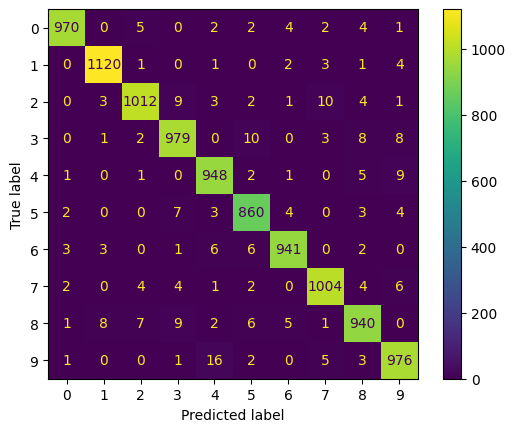

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
wavkan.cpu()
prediction = torch.argmax(wavkan(test_inputs.type(dtype)), dim=1) 
print(torch.mean((prediction == test_labels.type(torch.long)).type(dtype)))
#print(prediction.shape)
#print(dataset['test_label'].shape)
confusion_matrix_testset = confusion_matrix(prediction.detach().numpy(), test_labels.type(torch.long).detach().numpy())
print(confusion_matrix_testset)
disp_testset = ConfusionMatrixDisplay(confusion_matrix_testset)
disp_testset.plot()
plt.show()
del prediction 
del confusion_matrix_testset

tensor(0.9971)
[[1000    0    0    0    0    0    1    0    0    0]
 [   0 1122    2    0    0    1    1    0    0    0]
 [   0    0  988    0    0    0    0    1    0    0]
 [   0    0    0 1029    0    0    0    0    0    1]
 [   0    1    0    0  977    0    1    1    0    0]
 [   0    0    0    0    0  860    1    0    0    0]
 [   1    0    0    0    0    2 1010    0    1    0]
 [   0    0    0    2    0    0    0 1066    0    1]
 [   0    3    0    1    0    0    0    1  943    0]
 [   0    1    1    0    3    0    0    1    0  976]]


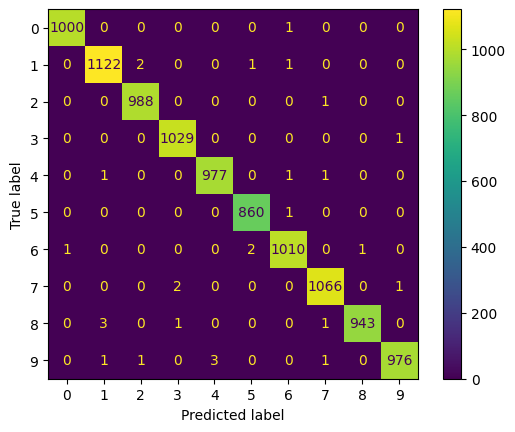

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
wavkan.cpu()
prediction = torch.argmax(wavkan(train_inputs.type(dtype)[:10000]), dim=1) 
print(torch.mean((prediction == train_labels.type(torch.long)[:10000]).type(dtype)))
#print(prediction.shape)
#print(dataset['test_label'].shape)
confusion_matrix_testset = confusion_matrix(prediction.detach().numpy(), train_labels.type(torch.long)[:10000].detach().numpy())
print(confusion_matrix_testset)
disp_testset = ConfusionMatrixDisplay(confusion_matrix_testset)
disp_testset.plot()
plt.show()

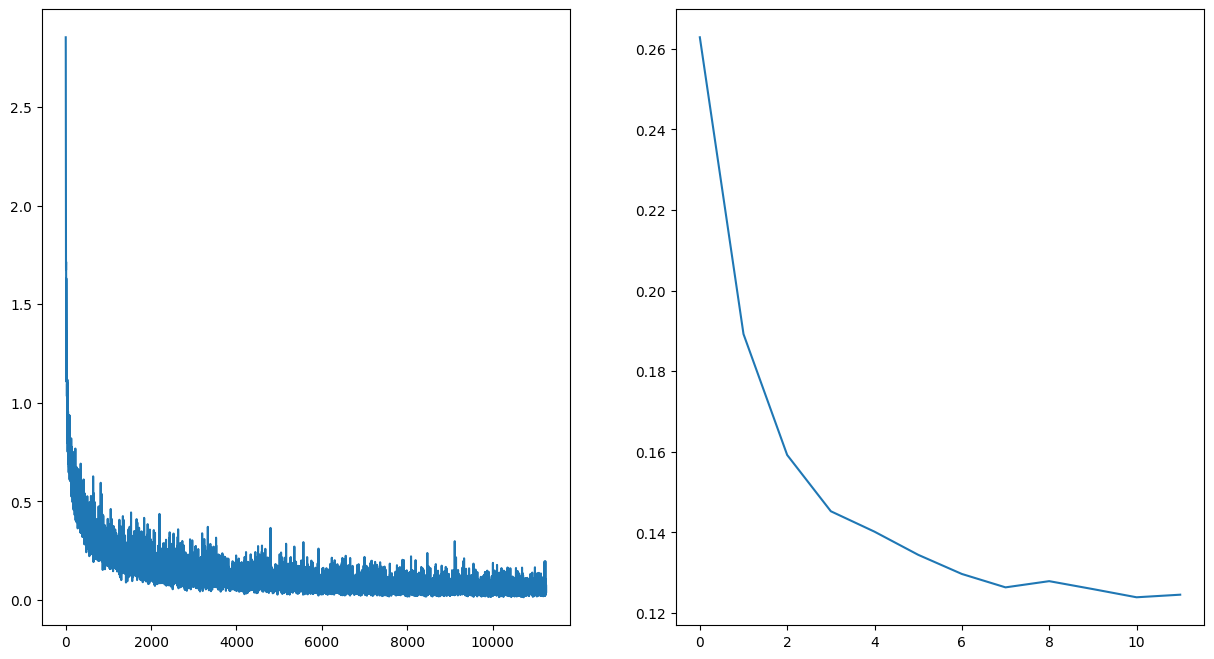

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(res['train_loss'])
plt.subplot(1,2,2)
plt.plot(res['test_loss'])

plt.show()

In [25]:
sum = 0
for param in wavkan.parameters():
  print(param.numel())
  sum = sum + param.numel()
print(sum)

50176
50176
50176
50176
64
64
640
640
640
640
10
10
203412


In [ ]:
wavkan.save()